In [ ]:
#I have referred to article for this assignment as the question is not defined clearly for KFOLD Test set and Dataset Test set.
#https://arxiv.org/pdf/1811.12808.pdf

### Import Library

In [1]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold

from time import time

import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing

In [2]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [3]:
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
trainX, train_Y = train_input[1:, :21], train_input[1:,-1].astype(int)
trainX = scale(trainX, np.min(trainX, axis=0), np.max(trainX, axis=0))
trainY = (train_Y-1).reshape(2126,1)

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size=0.3, random_state=11)

In [4]:
#Show train/test shape
print(trainX.shape, trainY.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2126, 21) (2126, 1)
(1488, 21) (1488, 1)
(638, 21) (638, 1)


## Part A1

### Model Evaluation with KFold Validation

In [5]:
#Evaluate Model with small sample
trainX = trainX[:1000]
trainY = trainY[:1000]

In [6]:
kf = KFold(5, shuffle=True, random_state=11)

In [7]:
acc = []
fold = 0
decay = 1e-6
epochs = 500
neuron = 10
batch_size = 32
lr = 0.01

#network size = [input,10,3]
model_1 = Sequential()
model_1.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
model_1.add(Dense(3, activation='softmax'))
model_1.compile(optimizer=Adam(lr=lr), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_1 = model_1.fit(trainX, trainY, validation_data=(X_test,Y_test), epochs=epochs, verbose=1, batch_size=batch_size)

#Record Final Accuracy
acc.append(history_1.history['val_accuracy'][epochs-1])

Epoch 1/500
32/32 [==============================] - 0s 5ms/step - loss: 0.9184 - accuracy: 0.6300 - val_loss: 0.7648 - val_accuracy: 0.7900
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.6930 - val_loss: 0.7680 - val_accuracy: 0.8260
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7944 - accuracy: 0.7750 - val_loss: 0.7373 - val_accuracy: 0.8229
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7691 - accuracy: 0.7850 - val_loss: 0.7263 - val_accuracy: 0.8260
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7587 - accuracy: 0.7930 - val_loss: 0.7158 - val_accuracy: 0.8386
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.7990 - val_loss: 0.7177 - val_accuracy: 0.8292
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7453 - accuracy: 0.8090 - val_loss: 0.7157 - val_accuracy: 0.8323
Epoch 8/500
3

Epoch 59/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.9020 - val_loss: 0.7185 - val_accuracy: 0.8245
Epoch 60/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.9010 - val_loss: 0.7144 - val_accuracy: 0.8292
Epoch 61/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.8980 - val_loss: 0.7239 - val_accuracy: 0.8245
Epoch 62/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.9000 - val_loss: 0.7160 - val_accuracy: 0.8276
Epoch 63/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.9020 - val_loss: 0.7336 - val_accuracy: 0.8150
Epoch 64/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.9030 - val_loss: 0.7116 - val_accuracy: 0.8307
Epoch 65/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.8990 - val_loss: 0.7135 - val_accuracy: 0.8323
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.9170 - val_loss: 0.7220 - val_accuracy: 0.8323
Epoch 117/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.9100 - val_loss: 0.7131 - val_accuracy: 0.8401
Epoch 118/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.9150 - val_loss: 0.7202 - val_accuracy: 0.8292
Epoch 119/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.9130 - val_loss: 0.7118 - val_accuracy: 0.8339
Epoch 120/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.9090 - val_loss: 0.7224 - val_accuracy: 0.8292
Epoch 121/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.9040 - val_loss: 0.7227 - val_accuracy: 0.8292
Epoch 122/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.9010 - val_loss: 0.7252 - val_accuracy: 0.8213
Epoch 123/500

32/32 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.9160 - val_loss: 0.7226 - val_accuracy: 0.8213
Epoch 174/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.9160 - val_loss: 0.7231 - val_accuracy: 0.8197
Epoch 175/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.9190 - val_loss: 0.7179 - val_accuracy: 0.8354
Epoch 176/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.9180 - val_loss: 0.7183 - val_accuracy: 0.8354
Epoch 177/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.9190 - val_loss: 0.7269 - val_accuracy: 0.8197
Epoch 178/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.9170 - val_loss: 0.7227 - val_accuracy: 0.8229
Epoch 179/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.9210 - val_loss: 0.7247 - val_accuracy: 0.8260
Epoch 180/500

32/32 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.9270 - val_loss: 0.7168 - val_accuracy: 0.8323
Epoch 231/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.9260 - val_loss: 0.7190 - val_accuracy: 0.8323
Epoch 232/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.9290 - val_loss: 0.7298 - val_accuracy: 0.8197
Epoch 233/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.9140 - val_loss: 0.7114 - val_accuracy: 0.8433
Epoch 234/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.9300 - val_loss: 0.7125 - val_accuracy: 0.8417
Epoch 235/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.9190 - val_loss: 0.7123 - val_accuracy: 0.8417
Epoch 236/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.9280 - val_loss: 0.7113 - val_accuracy: 0.8401
Epoch 237/500

32/32 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.9300 - val_loss: 0.7194 - val_accuracy: 0.8292
Epoch 288/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.9290 - val_loss: 0.7271 - val_accuracy: 0.8245
Epoch 289/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.9300 - val_loss: 0.7327 - val_accuracy: 0.8166
Epoch 290/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.9320 - val_loss: 0.7119 - val_accuracy: 0.8354
Epoch 291/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.9200 - val_loss: 0.7328 - val_accuracy: 0.8166
Epoch 292/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.9140 - val_loss: 0.7075 - val_accuracy: 0.8464
Epoch 293/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.9330 - val_loss: 0.7110 - val_accuracy: 0.8386
Epoch 294/500

32/32 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.9310 - val_loss: 0.7090 - val_accuracy: 0.8480
Epoch 345/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.9290 - val_loss: 0.7178 - val_accuracy: 0.8354
Epoch 346/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.9350 - val_loss: 0.7165 - val_accuracy: 0.8339
Epoch 347/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.9270 - val_loss: 0.7139 - val_accuracy: 0.8386
Epoch 348/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.9330 - val_loss: 0.7166 - val_accuracy: 0.8354
Epoch 349/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.9380 - val_loss: 0.7219 - val_accuracy: 0.8292
Epoch 350/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.9320 - val_loss: 0.7125 - val_accuracy: 0.8386
Epoch 351/500

32/32 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.9300 - val_loss: 0.7161 - val_accuracy: 0.8339
Epoch 402/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.9370 - val_loss: 0.7151 - val_accuracy: 0.8386
Epoch 403/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.9350 - val_loss: 0.7124 - val_accuracy: 0.8386
Epoch 404/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.9350 - val_loss: 0.7152 - val_accuracy: 0.8401
Epoch 405/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.9420 - val_loss: 0.7168 - val_accuracy: 0.8386
Epoch 406/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.9410 - val_loss: 0.7136 - val_accuracy: 0.8386
Epoch 407/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.9370 - val_loss: 0.7123 - val_accuracy: 0.8433
Epoch 408/500

32/32 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.9390 - val_loss: 0.7196 - val_accuracy: 0.8339
Epoch 459/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.9440 - val_loss: 0.7182 - val_accuracy: 0.8339
Epoch 460/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.9360 - val_loss: 0.7242 - val_accuracy: 0.8323
Epoch 461/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.9380 - val_loss: 0.7162 - val_accuracy: 0.8339
Epoch 462/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.9330 - val_loss: 0.7145 - val_accuracy: 0.8370
Epoch 463/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.9430 - val_loss: 0.7246 - val_accuracy: 0.8276
Epoch 464/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.9380 - val_loss: 0.7158 - val_accuracy: 0.8354
Epoch 465/500

### Model Evaluation

In [8]:
y_pred_1 = np.argmax(model_1.predict(X_test), axis=1)
print(f"Train Accuracy - {history_1.history['accuracy'][-1]*100:.2f}%")
print(f"Test Accuracy - {accuracy_score(y_pred_1, Y_test)*100:.2f}%")

Train Accuracy - 94.30%
Test Accuracy - 83.86%


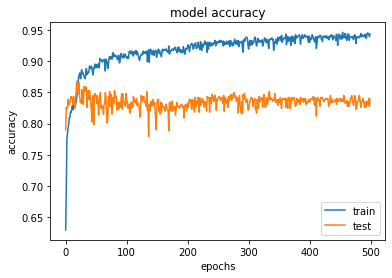

In [9]:
plt.title("model accuracy")
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.legend(["train", "test"],loc="best")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

#### Test error start converging at 50 epochs

## Part A2

In [10]:
lr = 0.01
decay = 1e-6
epochs = 50
neuron = 10
BATCH_SIZE = [4,8,16,32,64]

### Model Implementation

In [11]:
hist_2 = [] #store k-fold result
time_2 = [] #store batchsize time taken
fold_acc_2 = []
fold_loss_2 = []

for bs in BATCH_SIZE:
    
    fold = 0
    acc, loss = [], []
    start_time = time()
    
    print(f"Cross Validation for Batch Size: {bs}")
    for train, test in kf.split(X_train, Y_train):
        fold+=1

        #Get current splitted training set and test set
        x_train = X_train[train]
        y_train = Y_train[train]
        x_test = X_train[test]
        y_test = Y_train[test]
        
        #network size = [input,10,3]
        model_2 = Sequential()
        model_2.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
        model_2.add(Dense(3, activation='softmax'))
        model_2.compile(optimizer=Adam(lr=lr), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history_2 = model_2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, verbose=0, batch_size=bs)

        #Record all epochs values on current fold
        hist_2.append(history_2)

        #Record Final Accuracy & Loss
        acc.append(history_2.history['accuracy'][epochs-1])
        loss.append(history_2.history['loss'][epochs-1])

        print(f"Fold {fold} Accuracy - {acc[fold-1]*100:.2f}%")
        
    end_time = time()
    time_taken = end_time-start_time
    time_2.append(time_taken)
    fold_acc_2.append(np.mean(acc))
    fold_loss_2.append(np.mean(loss))
    print(f"5-Fold Average Accuracy - {np.mean(acc)*100:.2f}%, Time Taken - {time_taken:.2f}s\n")

Cross Validation for Batch Size: 4
Fold 1 Accuracy - 91.34%
Fold 2 Accuracy - 91.68%
Fold 3 Accuracy - 91.43%
Fold 4 Accuracy - 90.51%
Fold 5 Accuracy - 91.27%
5-Fold Average Accuracy - 91.25%, Time Taken - 45.65s

Cross Validation for Batch Size: 8
Fold 1 Accuracy - 91.51%
Fold 2 Accuracy - 91.76%
Fold 3 Accuracy - 91.51%
Fold 4 Accuracy - 92.11%
Fold 5 Accuracy - 92.78%
5-Fold Average Accuracy - 91.94%, Time Taken - 27.58s

Cross Validation for Batch Size: 16
Fold 1 Accuracy - 92.61%
Fold 2 Accuracy - 91.34%
Fold 3 Accuracy - 93.11%
Fold 4 Accuracy - 91.18%
Fold 5 Accuracy - 92.11%
5-Fold Average Accuracy - 92.07%, Time Taken - 18.19s

Cross Validation for Batch Size: 32
Fold 1 Accuracy - 91.93%
Fold 2 Accuracy - 91.01%
Fold 3 Accuracy - 90.76%
Fold 4 Accuracy - 85.05%
Fold 5 Accuracy - 92.28%
5-Fold Average Accuracy - 90.21%, Time Taken - 13.90s

Cross Validation for Batch Size: 64
Fold 1 Accuracy - 89.92%
Fold 2 Accuracy - 90.17%
Fold 3 Accuracy - 89.41%
Fold 4 Accuracy - 89.25%
Fo

### Averaging datapoint for each fold

In [12]:
#Algorithm for averaging all epochs data for plotting
acc_2 = []
loss_2 = []

for i in range(0,len(hist_2),5):
    temploss = []
    tempacc = []
    for j in range(5):
        tempacc.append(hist_2[i+j].history['accuracy'])
        temploss.append(hist_2[i+j].history['loss'])
    acc_2.append(np.mean(tempacc,axis=0))
    loss_2.append(np.mean(temploss,axis=0))

### Cross Validation Accuracy

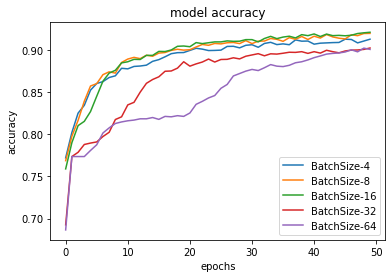

In [13]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
for i in range(len(acc_2)):
    plt.plot(acc_2[i], label='BatchSize-'+ str(BATCH_SIZE[i]))
plt.legend(loc="best")

plt.show()

### Cross Validation Loss

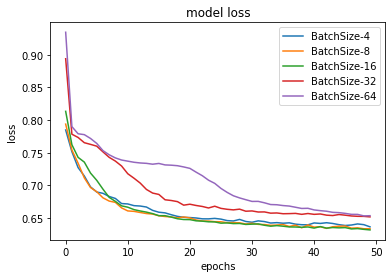

In [14]:
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
for i in range(len(loss_2)):
    plt.plot(loss_2[i], label='BatchSize-'+ str(BATCH_SIZE[i]))
plt.legend(loc="best")
plt.show()

### Time vs Epochs

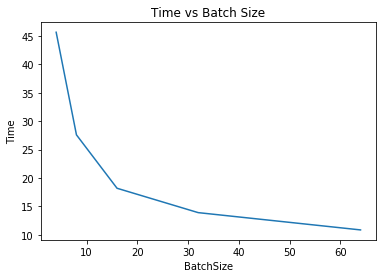

In [15]:
plt.title('Time vs Batch Size')
plt.ylabel('Time')
plt.xlabel('BatchSize')
plt.plot(BATCH_SIZE,time_2)
plt.show()

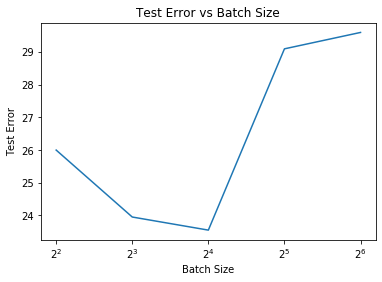

In [16]:
plt.title('Test Error vs Batch Size')
plt.ylabel('Test Error')
plt.xlabel('Batch Size')
plt.plot(BATCH_SIZE,len(y_test)*np.subtract(1,fold_acc_2))
plt.xscale('log',basex=2) 
plt.show()

### Results

#### Batch Size 16 was choosen as it is the most accurate and least loss, however, it took average time to train.

In [58]:
for i in range(len(BATCH_SIZE)):
    print(f"Batch_Size {BATCH_SIZE[i]:^2} - Time Taken - {time_2[i]:<5.2f}s, Average Accuracy - {fold_acc_2[i]*100:<5.2f}%, Average Loss - {fold_loss_2[i]:<18}, Test Error - {len(y_test)*np.subtract(1,fold_acc_3)[i]:.2f}")

Batch_Size 4  - Time Taken - 45.65s, Average Accuracy - 91.25%, Average Loss - 0.6366308212280274, Test Error - 28.59
Batch_Size 8  - Time Taken - 27.58s, Average Accuracy - 91.94%, Average Loss - 0.633725368976593 , Test Error - 25.70
Batch_Size 16 - Time Taken - 18.19s, Average Accuracy - 92.07%, Average Loss - 0.631931459903717 , Test Error - 24.10
Batch_Size 32 - Time Taken - 13.90s, Average Accuracy - 90.21%, Average Loss - 0.6518611550331116, Test Error - 24.35
Batch_Size 64 - Time Taken - 10.85s, Average Accuracy - 90.04%, Average Loss - 0.6536847829818726, Test Error - 24.20


## Part A3

In [18]:
lr = 0.01
decay = 1e-6
epochs = 50
batch_size = 16
N_NEURON = [5,10,15,20,25]

In [19]:
hist_3 = [] #store k-fold result
time_3 = [] #store batchsize time taken
fold_acc_3 = []
fold_loss_3 = []

for neuron in N_NEURON:
    
    fold = 0
    acc, loss = [], []
    start_time = time()
    
    print(f"Cross Validation for Num of Neuron: {neuron}")
    for train, test in kf.split(X_train, Y_train):
        fold+=1

        #Get current splitted training set and test set
        x_train = X_train[train]
        y_train = Y_train[train]
        x_test = X_train[test]
        y_test = Y_train[test]
        
        #network size = [input,10,3]
        model_3 = Sequential()
        model_3.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
        model_3.add(Dense(3, activation='softmax'))
        model_3.compile(optimizer=Adam(lr=lr), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history_3 = model_3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, verbose=0, batch_size=batch_size)

        #Record all epochs values on current fold
        hist_3.append(history_3)

        #Record Final Accuracy & Loss
        acc.append(history_3.history['accuracy'][epochs-1])
        loss.append(history_3.history['loss'][epochs-1])

        print(f"Fold {fold} Accuracy - {acc[fold-1]*100:.2f}%")
        
    end_time = time()
    time_taken = end_time-start_time
    time_3.append(time_taken)
    fold_acc_3.append(np.mean(acc))
    fold_loss_3.append(np.mean(loss))
    print(f"5-Fold Average Accuracy - {np.mean(acc)*100:.2f}%, Time Taken - {time_taken:.2f}s\n")
    

Cross Validation for Num of Neuron: 5
Fold 1 Accuracy - 89.75%
Fold 2 Accuracy - 89.92%
Fold 3 Accuracy - 91.26%
Fold 4 Accuracy - 90.18%
Fold 5 Accuracy - 90.76%
5-Fold Average Accuracy - 90.37%, Time Taken - 16.80s

Cross Validation for Num of Neuron: 10
Fold 1 Accuracy - 91.51%
Fold 2 Accuracy - 90.59%
Fold 3 Accuracy - 90.84%
Fold 4 Accuracy - 91.44%
Fold 5 Accuracy - 92.36%
5-Fold Average Accuracy - 91.35%, Time Taken - 18.10s

Cross Validation for Num of Neuron: 15
Fold 1 Accuracy - 92.18%
Fold 2 Accuracy - 92.02%
Fold 3 Accuracy - 92.77%
Fold 4 Accuracy - 91.10%
Fold 5 Accuracy - 91.35%
5-Fold Average Accuracy - 91.89%, Time Taken - 18.87s

Cross Validation for Num of Neuron: 20
Fold 1 Accuracy - 89.66%
Fold 2 Accuracy - 92.18%
Fold 3 Accuracy - 92.44%
Fold 4 Accuracy - 92.44%
Fold 5 Accuracy - 92.28%
5-Fold Average Accuracy - 91.80%, Time Taken - 18.67s

Cross Validation for Num of Neuron: 25
Fold 1 Accuracy - 92.69%
Fold 2 Accuracy - 91.01%
Fold 3 Accuracy - 91.85%
Fold 4 Accu

### Averaging datapoint for each fold

In [20]:
#Algorithm for averaging all epochs data for plotting
acc_3 = []
loss_3 = []

for i in range(0,len(hist_3),5):
    temploss = []
    tempacc = []
    for j in range(5):
        tempacc.append(hist_3[i+j].history['accuracy'])
        temploss.append(hist_3[i+j].history['loss'])
    acc_3.append(np.mean(tempacc,axis=0))
    loss_3.append(np.mean(temploss,axis=0))

### Cross Validation Accuracy

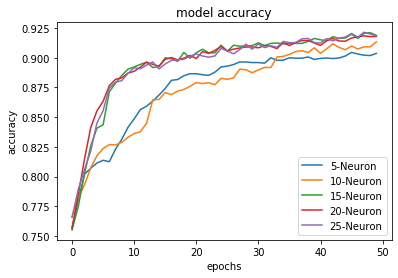

In [21]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
for i in range(len(acc_3)):
    plt.plot(acc_3[i], label=str(N_NEURON[i])+'-Neuron')
plt.legend(loc="best")

plt.show()

### Cross Validation Loss

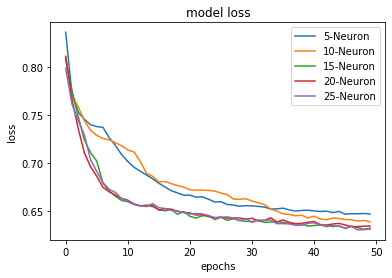

In [22]:
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
for i in range(len(loss_3)):
    plt.plot(loss_3[i], label=str(N_NEURON[i])+'-Neuron')
plt.legend(loc="best")
plt.show()

### Test Error vs Num of Neurons

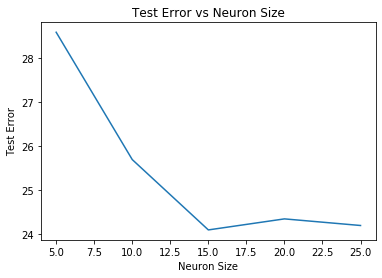

In [23]:
plt.title('Test Error vs Neuron Size')
plt.ylabel('Test Error')
plt.xlabel('Neuron Size')
plt.plot(N_NEURON,len(y_test)*np.subtract(1,fold_acc_3))
plt.show()

### Results

#### Neuron Size 15 was choosen as it have the highest accuracy and least test error.

In [56]:
for i in range(len(BATCH_SIZE)):
    print(f"Neuron Size {N_NEURON[i]:^2} - Time Taken - {time_3[i]:<5.2f}s, Average Accuracy - {fold_acc_3[i]*100:<5.2f}%, Average Loss - {fold_loss_3[i]}, Test Error - {len(y_test)*np.subtract(1,fold_acc_3)[i]:.2f}")

Neuron Size 5  - Time Taken - 16.80s, Average Accuracy - 90.37%, Average Loss - 0.6473470211029053, Test Error - 28.59
Neuron Size 10 - Time Taken - 18.10s, Average Accuracy - 91.35%, Average Loss - 0.6391317963600158, Test Error - 25.70
Neuron Size 15 - Time Taken - 18.87s, Average Accuracy - 91.89%, Average Loss - 0.6325815081596374, Test Error - 24.10
Neuron Size 20 - Time Taken - 18.67s, Average Accuracy - 91.80%, Average Loss - 0.6348388195037842, Test Error - 24.35
Neuron Size 25 - Time Taken - 18.88s, Average Accuracy - 91.85%, Average Loss - 0.6315408825874329, Test Error - 24.20


## Part A4

In [60]:
lr = 0.01
epochs = 50
batch_size = 16
neuron = 15
WEIGHTDECAY = [0,1e-3,1e-6,1e-9,1e-12]

### Model Implementation

In [61]:
hist_4 = [] #store k-fold result
time_4 = [] #store batchsize time taken
fold_acc_4 = []
fold_loss_4 = []

for wd in WEIGHTDECAY:
    
    fold = 0
    acc, loss = [], []
    start_time = time()
    
    print(f"Cross Validation for Weight Decay: {wd}")
    for train, test in kf.split(X_train, Y_train):
        fold+=1

        #Get current splitted training set and test set
        x_train = X_train[train]
        y_train = Y_train[train]
        x_test = X_train[test]
        y_test = Y_train[test]
        
        #network size = [input,10,3]
        model_4 = Sequential()
        model_4.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(wd)))
        model_4.add(Dense(3, activation='softmax'))
        model_4.compile(optimizer=Adam(lr=lr), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history_4 = model_4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, verbose=0, batch_size=batch_size)

        #Record all epochs values on current fold
        hist_4.append(history_4)

        #Record Final Accuracy & Loss
        acc.append(history_4.history['accuracy'][epochs-1])
        loss.append(history_4.history['loss'][epochs-1])

        print(f"Fold {fold} Accuracy - {acc[fold-1]*100:.2f}%")
        
    end_time = time()
    time_taken = end_time-start_time
    time_4.append(time_taken)
    fold_acc_4.append(np.mean(acc))
    fold_loss_4.append(np.mean(loss))
    print(f"5-Fold Average Accuracy - {np.mean(acc)*100:.2f}%, Time Taken - {time_taken:.2f}s\n")
    

Cross Validation for Weight Decay: 0
Fold 1 Accuracy - 92.52%
Fold 2 Accuracy - 92.02%
Fold 3 Accuracy - 91.51%
Fold 4 Accuracy - 92.19%
Fold 5 Accuracy - 91.77%
5-Fold Average Accuracy - 92.00%, Time Taken - 17.26s

Cross Validation for Weight Decay: 0.001
Fold 1 Accuracy - 90.59%
Fold 2 Accuracy - 77.90%
Fold 3 Accuracy - 90.00%
Fold 4 Accuracy - 89.17%
Fold 5 Accuracy - 87.91%
5-Fold Average Accuracy - 87.11%, Time Taken - 18.40s

Cross Validation for Weight Decay: 1e-06
Fold 1 Accuracy - 93.03%
Fold 2 Accuracy - 91.68%
Fold 3 Accuracy - 91.51%
Fold 4 Accuracy - 91.77%
Fold 5 Accuracy - 91.86%
5-Fold Average Accuracy - 91.97%, Time Taken - 17.57s

Cross Validation for Weight Decay: 1e-09
Fold 1 Accuracy - 92.02%
Fold 2 Accuracy - 91.18%
Fold 3 Accuracy - 90.92%
Fold 4 Accuracy - 91.77%
Fold 5 Accuracy - 91.86%
5-Fold Average Accuracy - 91.55%, Time Taken - 17.85s

Cross Validation for Weight Decay: 1e-12
Fold 1 Accuracy - 92.35%
Fold 2 Accuracy - 91.85%
Fold 3 Accuracy - 92.02%
Fold

### Averaging datapoint for each fold

In [62]:
#Algorithm for averaging all epochs data for plotting
acc_4 = []
loss_4 = []

for i in range(0,len(hist_4),5):
    temploss = []
    tempacc = []
    for j in range(5):
        tempacc.append(hist_4[i+j].history['accuracy'])
        temploss.append(hist_4[i+j].history['loss'])
    acc_4.append(np.mean(tempacc,axis=0))
    loss_4.append(np.mean(temploss,axis=0))

### Cross Validation Accuracy

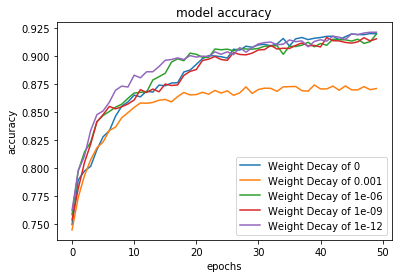

In [63]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
for i in range(len(acc_4)):
    plt.plot(acc_4[i], label='Weight Decay of '+str(WEIGHTDECAY[i]))
plt.legend(loc="best")

plt.show()

### Cross Validation Loss

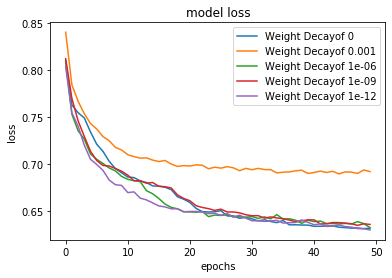

In [64]:
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
for i in range(len(loss_4)):
    plt.plot(loss_4[i], label='Weight Decayof '+str(WEIGHTDECAY[i]))
plt.legend(loc="best")

plt.show()

### Test Error vs Weight Decay

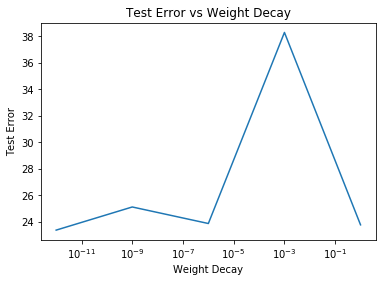

In [65]:
plt.title('Test Error vs Weight Decay')
plt.ylabel('Test Error')
plt.xlabel('Weight Decay')
plt.plot([1e0,1e-3,1e-6,1e-9,1e-12],len(y_test)*np.subtract(1,fold_acc_4))
plt.xscale('log',basex=10) 
plt.show()

### Results

#### Weight Decay of 1e-12 was choosen as it have the highest accuracy and 2nd least loss with an small difference in time taken.

In [66]:
for i in range(len(WEIGHTDECAY)):
    print(f"Weight Decay {WEIGHTDECAY[i]:<5} - Time Taken - {time_4[i]:<5.2f}s, Average Accuracy - {fold_acc_4[i]*100:<5.2f}%, Average Loss - {fold_loss_4[i]:<18}, Test Error - {len(y_test)*np.subtract(1,fold_acc_3)[i]:.2f}")

Weight Decay 0     - Time Taken - 17.26s, Average Accuracy - 92.00%, Average Loss - 0.6320974707603455, Test Error - 28.59
Weight Decay 0.001 - Time Taken - 18.40s, Average Accuracy - 87.11%, Average Loss - 0.6921550869941712, Test Error - 25.70
Weight Decay 1e-06 - Time Taken - 17.57s, Average Accuracy - 91.97%, Average Loss - 0.632681953907013 , Test Error - 24.10
Weight Decay 1e-09 - Time Taken - 17.85s, Average Accuracy - 91.55%, Average Loss - 0.6360469818115234, Test Error - 24.35
Weight Decay 1e-12 - Time Taken - 18.54s, Average Accuracy - 92.14%, Average Loss - 0.6302274584770202, Test Error - 24.20


## Part A5

### 3 Layers NN Optimal Hyperparameter

In [39]:
epochs = 250
lr = 0.01
neuron = 15
batch_size = 16
decay = 1e-12

### Retrain 3 Layer NN with Optimal Hyperparameter

In [40]:
acc_3l = []

#network size = [input,10,3]
model_3l = Sequential()
model_3l.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
model_3l.add(Dense(3, activation='softmax'))
model_3l.compile(optimizer=Adam(lr=lr), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_3l = model_3l.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=epochs, verbose=0, batch_size=batch_size)

#Record Final Accuracy
acc_3l.append(history_3l.history['val_accuracy'][epochs-1])

### 4 Layers NN Hyperparameter

In [41]:
epochs = 250
lr = 0.01
neuron = 10
batch_size = 32
decay = 1e-6

### Train 4 Layers NN

In [42]:
acc_4l = []

#network size = [input,10,3]
model_4l = Sequential()
model_4l.add(Dense(neuron, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(decay)))
model_4l.add(Dense(neuron, activation='relu', kernel_regularizer=l2(decay)))
model_4l.add(Dense(3, activation='softmax'))
model_4l.compile(optimizer=Adam(lr=lr), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_4l = model_4l.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=epochs, verbose=0, batch_size=batch_size)

#Record Final Accuracy
acc_4l.append(history_4l.history['val_accuracy'][epochs-1])

### Models Evaluation and Comparison

In [89]:
y_pred_3l = np.argmax(model_3l.predict(X_test), axis=1)
y_pred_4l = np.argmax(model_4l.predict(X_test), axis=1)
print(f"3 Layers NN Train Accuracy - {history_3l.history['accuracy'][-1]*100:.2f}%, 3 Layers NN Train Loss - {history_3l.history['loss'][-1]}")
print(f"3 Layers NN Test Accuracy  - {accuracy_score(y_pred_3l, Y_test)*100:.2f}%, 4 Layers NN Test Loss  - {history_3l.history['val_loss'][-1]}, 3 Layers NN Test Error - {int(len(Y_test)*np.subtract(1,acc_3l)[0])}")
print(f"4 Layers NN Train Accuracy - {history_4l.history['accuracy'][-1]*100:.2f}%, 4 Layers NN Train Loss - {history_4l.history['loss'][-1]}")
print(f"4 Layers NN Test Accuracy  - {accuracy_score(y_pred_4l, Y_test)*100:.2f}%, 4 Layers NN Test Loss  - {history_4l.history['val_loss'][-1]}, 4 Layers NN Test Error - {int(len(Y_test)*np.subtract(1,acc_4l)[0])}")

3 Layers NN Train Accuracy - 95.50%, 3 Layers NN Train Loss - 0.5978366732597351
3 Layers NN Test Accuracy  - 91.38%, 4 Layers NN Test Loss  - 0.6327537894248962, 3 Layers NN Test Error - 55
4 Layers NN Train Accuracy - 93.15%, 4 Layers NN Train Loss - 0.6216890215873718
4 Layers NN Test Accuracy  - 88.71%, 4 Layers NN Test Loss  - 0.6635890603065491, 4 Layers NN Test Error - 72


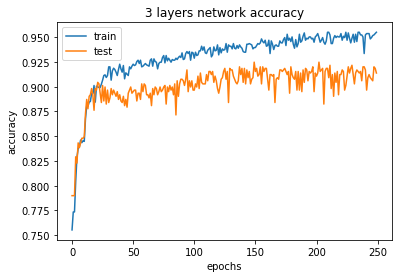

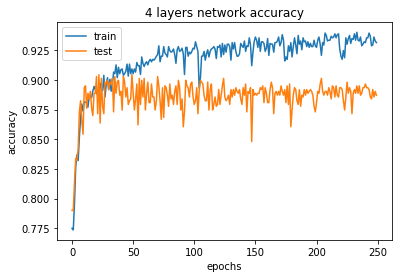

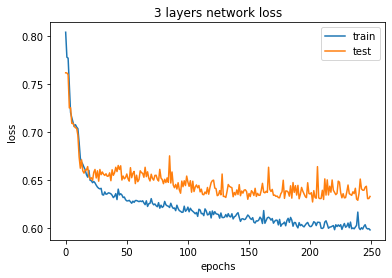

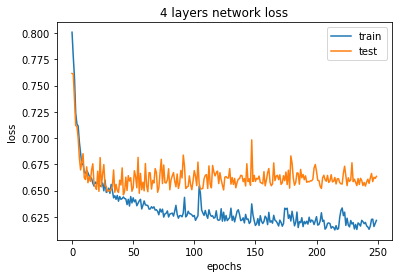

In [91]:
plt.title("3 layers network accuracy")
plt.plot(history_3l.history['accuracy'], label="train")
plt.plot(history_3l.history['val_accuracy'], label="test")
plt.legend(loc="best")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

plt.title("4 layers network accuracy")
plt.plot(history_4l.history['accuracy'],label="train")
plt.plot(history_4l.history['val_accuracy'], label="test")
plt.legend(loc="best")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

plt.title("3 layers network loss")
plt.plot(history_3l.history['loss'], label="train")
plt.plot(history_3l.history['val_loss'], label="test")
plt.legend(loc="best")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

plt.title("4 layers network loss")
plt.plot(history_4l.history['loss'],label="train")
plt.plot(history_4l.history['val_loss'], label="test")
plt.legend(loc="best")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()